In [5]:
import pandas as pd
import numpy as np

import pickle
from processing import processing
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from keras.layers import Dense, ReLU

dfs = processing("Data")

In [6]:
def return_model(fileName):
    return tf.keras.models.load_model(f"Models\\{fileName}")

filepaths = {"Model_CNN.keras", "Model_GRU.keras", "Model_LSTM.keras"}
models = [return_model(filepath) for filepath in filepaths]

with open(f'Models\\Model_XGB.pkl', 'rb') as file:
    models.append(pickle.load(file))

scaler = StandardScaler()

all_data = np.concatenate([dfs[f'Data\\{year}'].drop('PtsNextGame', axis=1).to_numpy() for year in range(2021, 2024)], axis=0)
scaler.fit(all_data)

StandardScaler()

In [7]:
def return_model(fileName):
    return tf.keras.models.load_model(f"Models\\{fileName}")

filepaths = {"Model_CNN.keras", "Model_GRU.keras", "Model_LSTM.keras"}
models = [return_model(filepath) for filepath in filepaths]

with open(f'Models\\Model_XGB.pkl', 'rb') as file:
    models.append(pickle.load(file))

In [29]:
estimation_matrix = []

X = np.concatenate([dfs[f'Data\\{year}'].drop('PtsNextGame', axis=1).to_numpy() for year in range(2021, 2025)], axis=0)
y = np.concatenate([dfs[f'Data\\{year}']['PtsNextGame'].to_numpy() for year in range(2021, 2025)], axis=0)
X = scaler.transform(X)

estimation_matrix.append(models[0].predict(X.reshape(X.shape[0], X.shape[1]), 1))
estimation_matrix.append(models[1].predict(X.reshape(X.shape[0], 1, X.shape[1])))
estimation_matrix.append(models[2].predict(X.reshape(X.shape[0], 1, X.shape[1])))
estimation_matrix.append(models[3].predict(X.reshape(X.shape[0], X.shape[1])))

estimation_matrix = [pred.reshape(-1, 1) for pred in estimation_matrix]
X_estimate = np.concatenate(estimation_matrix, axis=1)

290/290 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [30]:
n, m = X_estimate.shape

linear_model = Sequential([

    Dense(1,
          input_shape = (m, ),
          activation='linear'),

])

linear_model.compile(optimizer = 'adam', loss = 'mse')
linear_model.fit(X_estimate, y, epochs = 500)
weights = linear_model.get_weights()[0].flatten()

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

print((weights))
weights

Epoch 1/500


C:\Users\suhan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 998us/step - loss: 1058.6970
Epoch 2/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 961.1689 
Epoch 3/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - loss: 919.2087
Epoch 4/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 855.5129 
Epoch 5/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 766.1343 
Epoch 6/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - loss: 752.7472
Epoch 7/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 741.3958 
Epoch 8/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - loss: 668.9785
Epoch 9/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 621.4576 
Epoch 10/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 585.8150 
Epoch 11/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - loss: 573.2399
Epoch 12/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - loss: 517.7771
Epoch 13/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 458.2360 
Epoch 14/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 437.2598 
Epoch 15/500
10/10 ━━━━━━━━━━━━━━━

array([0.3481098 , 0.08618955, 0.1934508 , 0.4215216 ], dtype=float32)

In [31]:
print(weights)

[0.3481098  0.08618955 0.1934508  0.4215216 ]


In [32]:
final_prediction = X_estimate @ weights
final_prediction.shape

(290,)

Text(0, 0.5, 'PTS')

<Figure size 1500x1500 with 0 Axes>

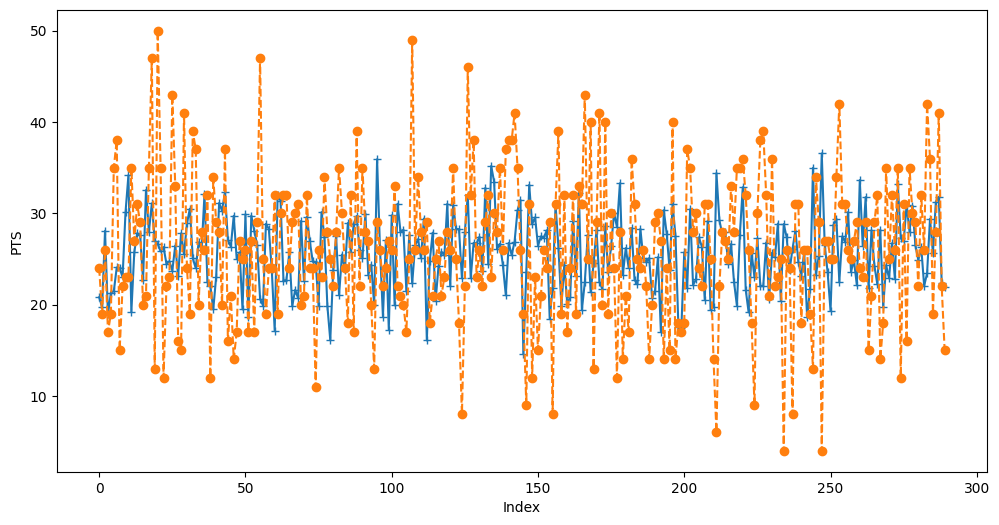

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,15))
plt.figure(figsize=(12, 6))
plt.plot(final_prediction.reshape(-1), label = 'Predicted', linestyle = '-', marker = '+')
plt.plot(y, label='Actual', linestyle='--', marker='o')
plt.xlabel('Index')
plt.ylabel('PTS')


1771.5489673614502


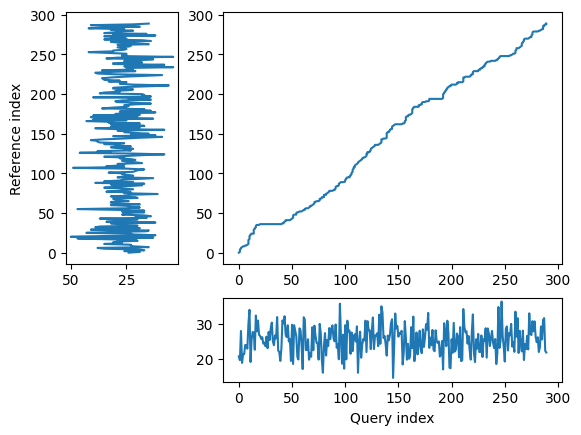

In [34]:
from dtw import *

query = final_prediction
template = y

alignment = dtw(query, template, keep_internals=True)
alignment.plot(type="threeway")

print(alignment.distance)
